In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [4]:
df=pd.read_csv("weatherAUS.csv")

In [5]:
cat = df.select_dtypes(include=['object', 'category']).columns
df= pd.get_dummies(df, columns=cat, drop_first=True)
df=df.fillna(df.mean())

In [6]:
df.isnull().sum().sum()

0

In [7]:
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Pressure9am', 'Temp9am']
X = df[features]

In [8]:
X = SimpleImputer(strategy='mean').fit_transform(X)

In [9]:
X_std = StandardScaler().fit_transform(X)

In [22]:
inertia = []
for n_clusters in range(1, 15):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_std)
    inertia.append(kmeans.inertia_)

/Users/debangshi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/debangshi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/debangshi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/debangshi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

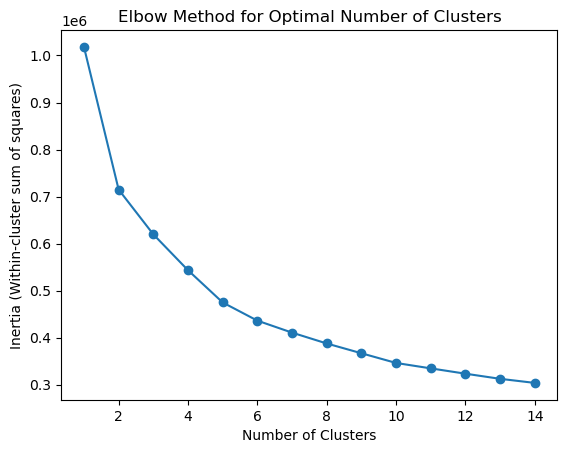

In [23]:
plt.plot(range(1, 15), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.show()

In [24]:
# Based on the elbow curve, choose the optimal number of clusters
optimal_clusters = 2 

In [25]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_std)

/Users/debangshi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [26]:
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:")
print(pd.DataFrame(cluster_centers, columns=features))

Cluster Centers:
    MinTemp  MaxTemp  Rainfall  WindGustSpeed  Humidity9am  Pressure9am  \
0 -0.688527 -0.69720 -0.007713      -0.200991     0.378404     0.406496   
1  0.775294  0.78506  0.008685       0.226320    -0.426090    -0.457722   

    Temp9am  
0 -0.736931  
1  0.829798  


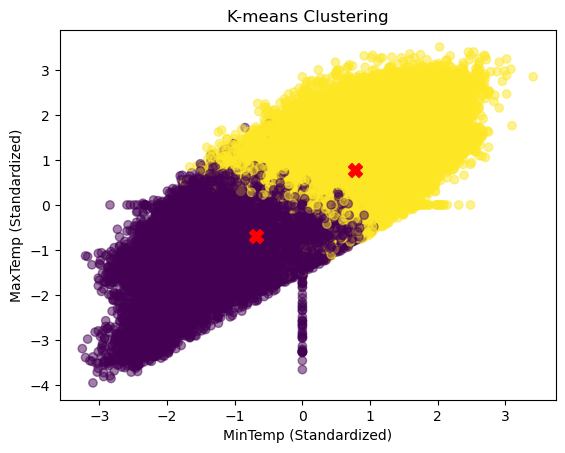

In [15]:
plt.scatter(X_std[:, 0], X_std[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=100)
plt.title('K-means Clustering')
plt.xlabel('MinTemp (Standardized)')
plt.ylabel('MaxTemp (Standardized)')
plt.show()